In [1]:
import numpy as np #importa a biblioteca numpy
from sklearn.model_selection import train_test_split #importa biblioteca de testes
from sklearn.tree import DecisionTreeClassifier #importa a arvore de decisão
from sklearn import tree #importa a função tree para plotar a arvore
from sklearn.metrics import accuracy_score #métrica de ácuracia do algoritimo
from sklearn.metrics import confusion_matrix # importa matiz de confusão
import pandas as pd #importa a biblioteca pandas
import matplotlib.pyplot as plt # importa a matplotlib
import seaborn as sns # importa a seaborn

In [46]:
# Criando a base de dados
data = pd.DataFrame({
    'Idade(anos)': [5,10,3,8,1,15],
    'Histórico de Manutenção': ['Bom', 'Ruim', 'Excelente', 'Regular', 'Excelente', 'Ruim'],
    'Numero de Falhas Anteriores': [0,3,0,2,0,5],
    'Nivel de Automação':['Alto', 'Baixo', 'Médio', 'Alto', 'Médio', 'Baixo'],
    'Classificação': ['Segura', 'Não Segura', 'Segura', 'Não Segura', 'Segura', 'Não Segura']
})


In [48]:
# Convertendo variáveis categóricas em variáveis dummy (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['Nivel de Automação', 'Histórico de Manutenção'], drop_first=True)

# Selecionando as características e a variável alvo
X = data_encoded[['Idade(anos)', 'Numero de Falhas Anteriores', 'Nivel de Automação_Baixo', 'Nivel de Automação_Médio', 'Histórico de Manutenção_Ruim', 'Histórico de Manutenção_Regular']]
y = data_encoded['Classificação']

# Convertendo a variável alvo para numérica
y = y.map({'Segura': 1, 'Não Segura': 0})


In [49]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Criando o modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [52]:
# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 1.0
Matriz de Confusão:
[[1 0]
 [0 1]]


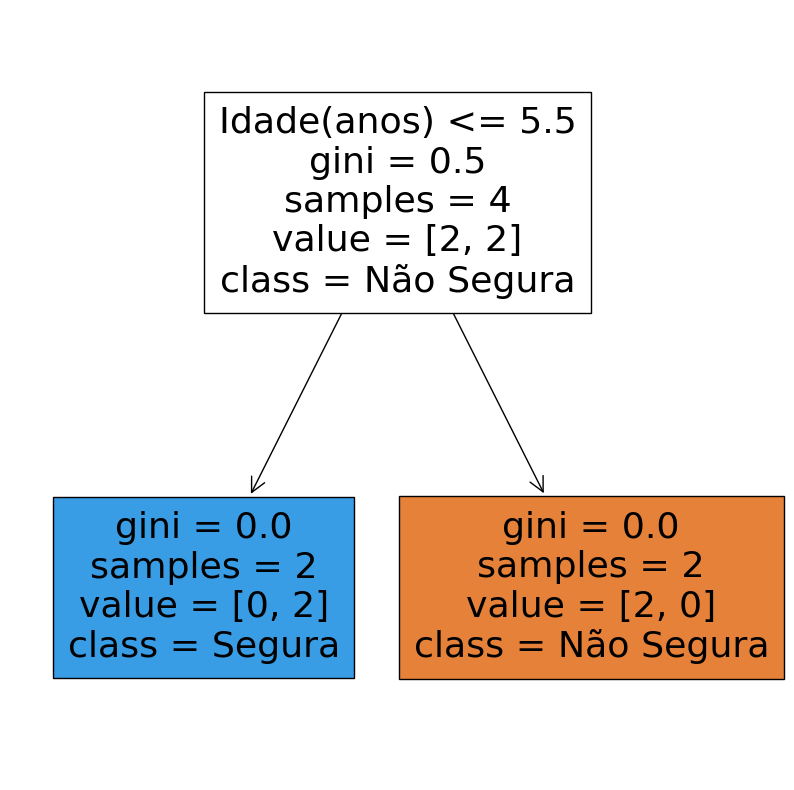

In [58]:
# Visualizando a árvore de decisão
plt.figure(figsize=(10,10))
tree.plot_tree(
    model, 
    feature_names=X.columns.tolist(),  # Converte Index para lista de strings
    class_names=['Não Segura', 'Segura'], 
    filled=True
)
plt.show()


